In [1]:

from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import time
get_ipython().magic('matplotlib inline')



def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)

def import_data():
    if "data" not in os.listdir(os.getcwd()):
        # Untar directory of data if we haven't already
        tarObject = tarfile.open("data.tar.gz")
        tarObject.extractall()
        tarObject.close()
        print("Extracted tar to current directory")
    else:
        # we've already extracted the files
        pass

    print("loading training data")
    trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
    trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
    print("loading test data")
    testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
    testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
    return trainX,trainY,testX,testY

trainX,trainY,testX,testY = import_data()




loading training data
loading test data


In [2]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

numEpochs = 20000
learningRate = 0.5
print ("Num Features",numFeatures)
print ("Labels:",numLabels)

Num Features 2955
Labels: 2


In [3]:

X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

# Hidden Layer 1 Parameters
weights1 = tf.Variable(tf.random_normal([numFeatures,numLabels*3],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))

bias1 = tf.Variable(tf.random_normal([1,numLabels*3],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))
# Hidden Layer 2 parameters
weights2 = tf.Variable(tf.random_normal([numLabels*3,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))

bias2 = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))


step 0, training accuracy 0.466946
step 0, change in cost 1.59345
step 100, training accuracy 0.585519
step 100, change in cost 0.919326
step 200, training accuracy 0.66212
step 200, change in cost 0.0201554
step 300, training accuracy 0.714586
step 300, change in cost 0.0194233
step 400, training accuracy 0.746065
step 400, change in cost 0.0210141
step 500, training accuracy 0.767051
step 500, change in cost 0.0237725
step 600, training accuracy 0.789087
step 600, change in cost 0.0270252
step 700, training accuracy 0.820567
step 700, change in cost 0.0301889
step 800, training accuracy 0.837356
step 800, change in cost 0.0326526
step 900, training accuracy 0.869885
step 900, change in cost 0.0338979
step 1000, training accuracy 0.889822
step 1000, change in cost 0.0337308
step 1100, training accuracy 0.902413
step 1100, change in cost 0.0323577
step 1200, training accuracy 0.70829
step 1200, change in cost 0.0785539
step 1300, training accuracy 0.770199
step 1300, change in cost 0.0

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


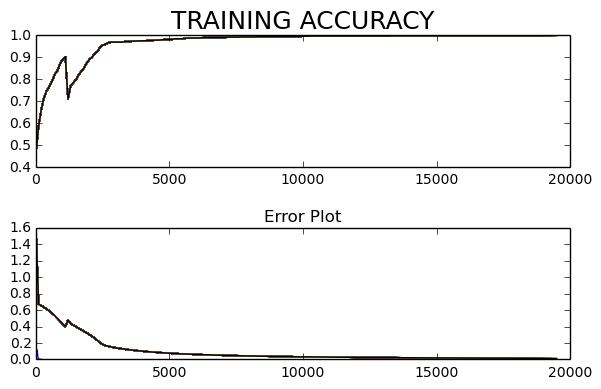

In [5]:

init_OP = tf.initialize_all_variables()

# Hidden Layer 1: Obtaining weighted matrix
apply_weights_OP = tf.matmul(X, weights1, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias1, name="add_bias") 

# Activation Funciton
activation_OP1 = tf.nn.sigmoid(add_bias_OP, name="activation")

# Hidden Layer 2
activation_OP = tf.nn.softmax(tf.add(tf.matmul(activation_OP1,weights2), bias2))


# Cross Entropy eror
#cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
cost_OP = tf.reduce_mean(-tf.reduce_sum(yGold * tf.log(activation_OP), reduction_indices=[1]))

# Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

epoch_values=[]
accuracy_values=[]
cost_values=[]
# Turn on interactive plotting
plt.ion()
# Create the main, super plot
fig = plt.figure()
# Create two subplots on their own axes and give titles
ax1 = plt.subplot("211")
ax1.set_title("TRAINING ACCURACY", fontsize=18)
ax2 = plt.subplot("212")
ax2.set_title("TRAINING COST", fontsize=18)
plt.tight_layout()


# Initialize reporting variables
cost = 0
diff = 1
errors =[]
with tf.Session() as sess:
    sess.run(init_OP)
    correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
    accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
        

# Training
    for i in range(numEpochs):
        if i > 1 and diff < .0001:
            print("change in cost %g; convergence."%diff)
            break
        else:
        # Run training step
            step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
            if i % 100 == 0:
            # Add epoch to epoch_values
                epoch_values.append(i)
            # Generate accuracy stats on test data
                train_accuracy, newCost = sess.run(
                [accuracy_OP, cost_OP], 
                feed_dict={X: trainX, yGold: trainY}
                )
                errors.append(1 - train_accuracy)
            # Add accuracy to live graphing variable
                accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
                cost_values.append(newCost)
           
            # Re-assign values for variables
                diff = abs(newCost - cost)
                cost = newCost

            #generate print statements
                print("step %d, training accuracy %g"%(i, train_accuracy))
                #print("step %d, cost %g"%(i, newCost))
                print("step %d, change in cost %g"%(i, diff))

            # Plot progress to our two subplots
                accuracyLine, = ax1.plot(epoch_values, accuracy_values)
                costLine, = ax2.plot(epoch_values, cost_values)
                fig.canvas.draw()
                time.sleep(1)


    print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))
    print("Error: ", errors[-1])
    
    plt.title('Error Plot')
    plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
    plt.show()

# Create Saver
saver = tf.train.Saver()
# Save variables to .ckpt file
# saver.save(sess, "trained_variables.ckpt")

In [6]:
errors[:]

[0.53305351734161377,
 0.41448056697845459,
 0.33788037300109863,
 0.28541445732116699,
 0.25393491983413696,
 0.23294860124588013,
 0.21091288328170776,
 0.17943334579467773,
 0.16264426708221436,
 0.13011544942855835,
 0.11017841100692749,
 0.097586572170257568,
 0.29171037673950195,
 0.22980064153671265,
 0.21615952253341675,
 0.20251834392547607,
 0.17943334579467773,
 0.16474294662475586,
 0.14900314807891846,
 0.12696748971939087,
 0.11017841100692749,
 0.099685192108154297,
 0.08394545316696167,
 0.074501574039459229,
 0.054564535617828369,
 0.045120656490325928,
 0.040923416614532471,
 0.03462749719619751,
 0.031479537487030029,
 0.031479537487030029,
 0.031479537487030029,
 0.031479537487030029,
 0.031479537487030029,
 0.029380917549133301,
 0.028331577777862549,
 0.028331577777862549,
 0.027282238006591797,
 0.02623295783996582,
 0.02623295783996582,
 0.025183618068695068,
 0.025183618068695068,
 0.025183618068695068,
 0.024134337902069092,
 0.024134337902069092,
 0.023084998

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


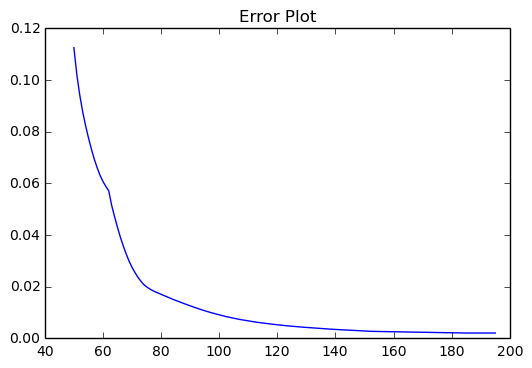

In [7]:
get_ipython().magic('matplotlib inline')
plt.title('Error Plot')
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()